In [3]:
# Import libraries
import os
import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

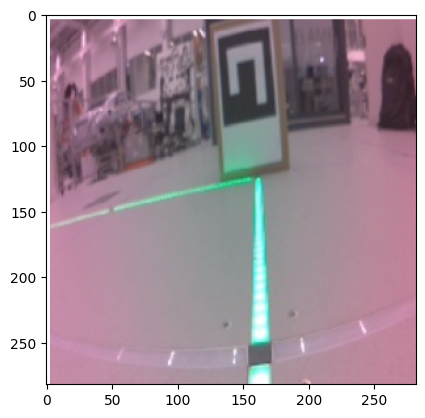

In [15]:
# Read in an image
image = cv2.imread("frame1.png", cv2.IMREAD_COLOR)

# Display the original image
plt.imshow(image[:, :, ::-1])

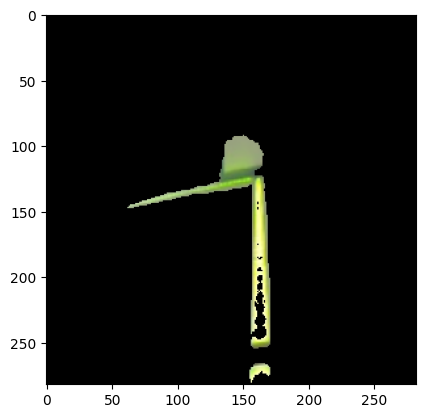

In [16]:
# Convert BGR to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# define range of blue color in HSV
lower_green = np.array([35,50,50])
upper_green = np.array([90,255,255])
# Threshold the HSV image to get only green colors
mask = cv2.inRange(hsv, lower_green, upper_green)
# Bitwise-AND mask and original image
res = cv2.bitwise_and(image, image, mask= mask)
plt.imshow(res)


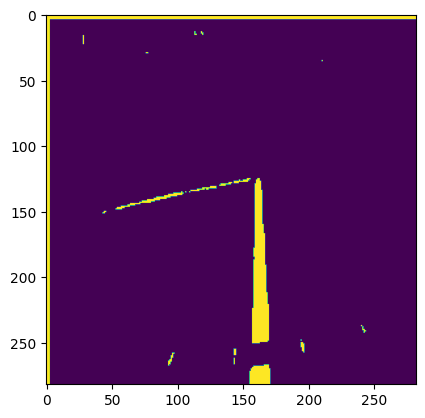

In [22]:
r_val, img_thresh_val = cv2.threshold(image[:, :, 1], 200, 255, cv2.THRESH_BINARY)
plt.imshow(img_thresh_val)

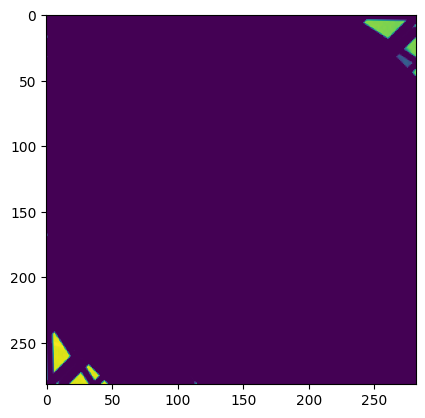

In [30]:
# FUnktioniert NICHT so wie erwartet
img_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# for_line_detection = img_grey.astype(np.uint8)
cdstP = np.copy(img_grey)

linesP = cv2.HoughLinesP(img_grey, 1, np.pi / 180, 50, None, 50, 10)
    
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

    plt.imshow(cdstP)

In [6]:
print(image.shape)
#matrix = np.ones(img_rgb.shape, dtype="uint8") 
print(image)

(282, 282, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [158 134 194]
  [157 133 193]
  [154 130 190]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [158 134 194]
  [157 133 193]
  [153 129 189]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [158 134 194]
  [158 133 194]
  [156 131 192]]]


Text(0.5, 1.0, 'Thresholded')

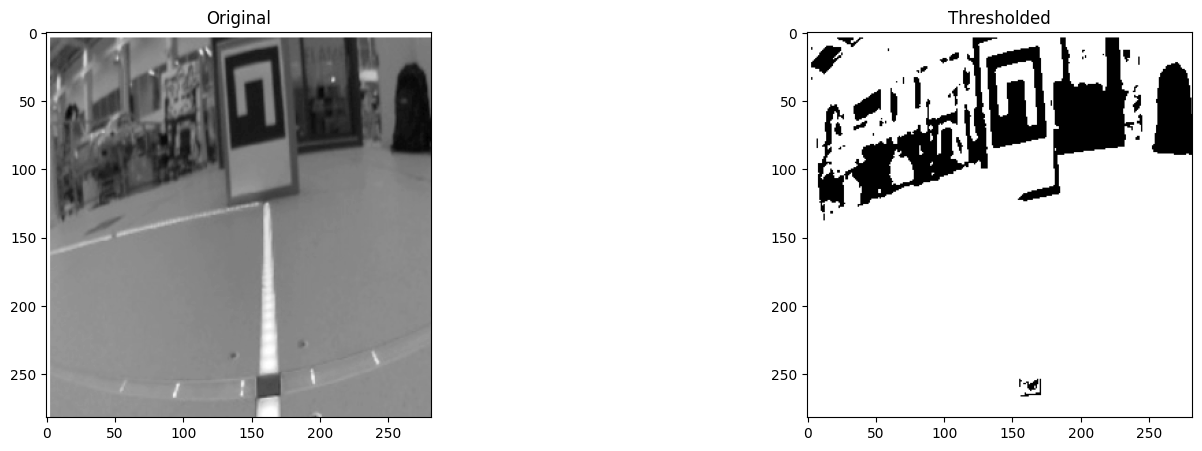

In [14]:
imgGrayScale = cv2.imread("frame1.png", cv2.IMREAD_GRAYSCALE)
#plt.imshow(image[:, :, ::-1])
retval, img_thresh = cv2.threshold(imgGrayScale, 100, 150, cv2.THRESH_BINARY)
# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(121);plt.imshow(imgGrayScale, cmap="gray");  plt.title("Original")
plt.subplot(122);plt.imshow(img_thresh, cmap="gray");plt.title("Thresholded")


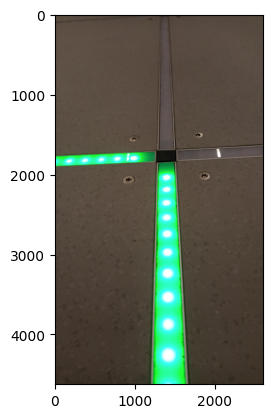

In [15]:
# Read in an image
imageLshape = cv2.imread("frameLshape.jpg", cv2.IMREAD_COLOR)

# Display the original image
plt.imshow(imageLshape[:, :, ::-1])

(4624, 2600, 3)


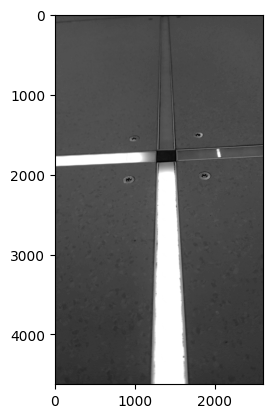

In [35]:
print(imageLshape.shape)

plt.imshow(imageLshape[:, :, 1], cmap="gray")


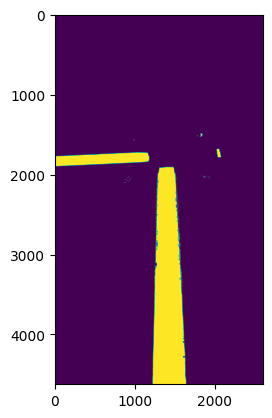

In [40]:

retval, img_thresh = cv2.threshold(imageLshape[:, :, 1], 150, 255, cv2.THRESH_BINARY)
plt.imshow(img_thresh)

In [42]:

# Convert the image to float32
image_float32 = np.float32(imageLshape[:, :, 1])

# Harris corner detection parameters
block_size = 2  # Size of the neighborhood for corner detection
ksize = 3  # Aperture parameter of the Sobel derivative used for corner detection
k = 0.04  # Harris detector free parameter

# Perform Harris corner detection
corners = cv2.cornerHarris(image_float32, blockSize=block_size, ksize=ksize, k=k)

# Threshold for an optimal value, it may vary depending on the image
threshold = 0.01 * corners.max()

# Mark the corners on the image
image_with_corners = image.copy()
image_with_corners[corners > threshold] = [0, 255, 0]  # Red color for marked corners

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(image_with_corners, cmap='gray')
plt.title('Corners Detected')

plt.show()


IndexError: boolean index did not match indexed array along dimension 0; dimension is 282 but corresponding boolean dimension is 4624

In [34]:
imageLshape[:, :, 1]
print(imageLshape[4000,1505,2])

43


Text(0.5, 1.0, 'Green Channel Histogram')

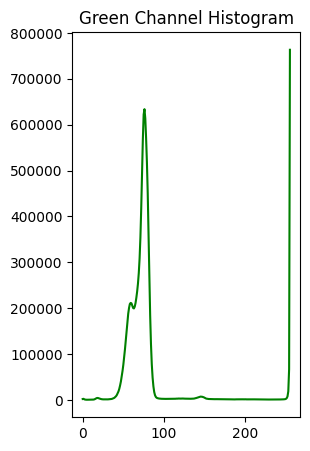

In [30]:
hist_channel_g = cv2.calcHist([imageLshape], [1], None, [256], [0, 256])
plt.figure(figsize=(10, 5))
plt.subplot(132)
plt.plot(hist_channel_g, color='green')
plt.title('Green Channel Histogram')